# Ejercicio 1

Indicar cuál de los siguientes puntos es correcto, justificando tu respuesta. Regresión ridge y regresión lasso, relativa a mínimos cuadrados, son:

- Más flexibles y, por lo tanto, brindarán una mejora en la precisión de las predicciones cuando su aumento en sesgo sea menor que su disminución en varianza

- Más flexibles y, por lo tanto, brindarán una mejora en la precisión de las predicciones cuando su aumento en varianza sea menor que su disminución en sesgo.

- Menos flexibles y, por lo tanto, brindarán una mejora en la precisión de las predicciones cuando su aumento en sesgo sea menor que su disminución en varianza. **CORRECTO**

- Menos flexibles y, por lo tanto, brindarán una mejora en la precisión de las predicciones cuando su aumento en varianza sea menor que su disminución en sesgo.

Razonamiento:

- Las predicciones de la regresion por minimos cuadrados ordinarios son insesgadas pero tiene alta varianza, especialmente si $p \approx n$. Además si $p>n$ no se puede estimar la regresion por minimos cuadrados ordinarios.

-  La regresión Ridge y Lasso se basa en el equilibrio entre sesgo y varianza. Disminuye sustancialmente la varianza de las predicciones a costa de aumentar un poco su sesgo (es por ello un método menos flexible, que genera menos sobre-ajuste). Además, incluso si $\hspace{0.1cm}p \approx n \hspace{0.1cm}$ o $\hspace{0.1cm} p>n\hspace{0.1cm}$ , la regresion Ridge puede funcionar bien.

- Esto lleva a que si $\lambda$ es seleccionado correctamente, el error cuadratico medio de prediccion $(ECMP)$ es menor en la regresion Ridge y Lasso que en la de minimos cuadrados ordinarios, lo que conduce a mayor capacidad predictiva de Ridge sobre minimos cuadrados ordinarios.

En minimoss cuadrados no hay restriccion en el problema de optimizacion, en Ridge y Lasso si que la hay, el conjunto de soluciones factibles es mas reducido, por ello son menos flexibles.

# Ejercicio 2

tablet

# Ejercicio 6



En este ejercicio, se pide obtener predicciones del logaritmo de la variable crim del conjunto de datos Boston de la librería ISLR2 utilizando el resto de variables como predictores, mediante los siguientes métodos:

Regresión ridge.

Regresión lasso.

Para ello, por sencillez utilizar una muestra de entrenamiento y de test y obtener los correspondientes valores del error cuadrático medio test. Comparar los resultados y explicar las conclusiones más relevantes. Para crear la muestra de entrenamiento, con 355 observaciones seleccionadas al azar, y la muestra test, con las 151 observaciones restantes, fijar la semilla mediante la orden set.seed(1). Esto es importante para poder comparar los resultados con otros procedimientos que veremos en la hoja de la semana que viene.

In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv'

Boston = pd.read_csv(url)

In [2]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
Boston['crim'] = np.log(Boston['crim'])

In [4]:
Boston_Train = Boston.sample(frac=0.70, replace=False, weights=None, random_state=10, axis=None, ignore_index=False)

Boston_Test = Boston.drop( Boston_Train.index , )

In [5]:
## TEST

X_test = Boston_Test.loc[: , Boston_Test.columns != 'crim']
Y_test = Boston_Test.loc[: , 'crim']

##############################################################

## TRAIN

X_train = Boston_Train.loc[: , Boston_Train.columns != 'crim']
Y_train = Boston_Train.loc[: , 'crim']


In [6]:
import statsmodels.formula.api as smf

In [7]:
modelo_MCO_completo =  smf.ols(formula = 'crim ~ zn + indus + C(chas) + nox + rm +  age + dis + rad + tax + ptratio + black + lstat + medv', data =Boston_Train)

modelo_MCO_completo = modelo_MCO_completo.fit()
 
print(modelo_MCO_completo.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.76e-147
Time:                        16:53:54   Log-Likelihood:                -399.79
No. Observations:                 354   AIC:                             827.6
Df Residuals:                     340   BIC:                             881.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.2160      1.018     -4.140   

In [8]:
ECM_test_MCO_completo = ( ( modelo_MCO_completo.predict(X_test) - Y_test )**2 ).sum() / len(Y_test)

In [9]:
ECM_test_MCO_completo

0.6514719611490994

El mejor modelo de regresion de minimos cuadrados ordinarios por validación simple usando algoritmos de selección de predictores (practica anterior) es:

crim ~ zn + indus + nox + age + ptratio + lstat + medv

In [10]:
modelo_MCO_mejor =  smf.ols(formula = 'crim ~ zn + indus + nox + age + ptratio + lstat + medv', data =Boston_Train)

modelo_MCO_mejor = modelo_MCO_mejor.fit()
 
print(modelo_MCO_mejor.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     130.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           6.09e-93
Time:                        16:53:54   Log-Likelihood:                -546.11
No. Observations:                 354   AIC:                             1108.
Df Residuals:                     346   BIC:                             1139.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.6154      0.983    -11.817      0.0

In [11]:
ECM_test_MCO_mejor = ( ( modelo_MCO_mejor.predict(X_test) - Y_test )**2 ).sum() / len(Y_test)

In [12]:
ECM_test_MCO_mejor

1.5402752002272841

In [13]:
import sklearn

from sklearn import linear_model

In [14]:
Ridge_sklearn = sklearn.linear_model.Ridge( alpha=1.0 , fit_intercept=True)

Ridge_sklearn.fit(X_train, Y_train)  # No es necesario escalar los datos.

ECM_test_Ridge = sum( ( Ridge_sklearn.predict(X_test) - Y_test)**2 ) / len(Y_test)

In [15]:
ECM_test_Ridge

0.6652010112086071

In [16]:
Ridge_sklearn.coef_

array([-1.00847630e-02,  3.50905885e-02,  8.80873440e-02,  1.88176412e+00,
        1.63544362e-02,  7.72145986e-03, -3.40396188e-02,  1.46691279e-01,
        1.06564065e-04, -7.15574837e-02, -1.51143958e-03,  3.81242830e-02,
        7.33882418e-03])

In [17]:
Ridge_sklearn.feature_names_in_

array(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'], dtype=object)

In [18]:
Ridge_sklearn.intercept_

-2.8273799064867458

In [19]:
ECM_test_Ridge_vector = []

for alpha in range(1, 10000):

    Ridge_sklearn = sklearn.linear_model.Ridge( alpha=alpha )

    Ridge_sklearn.fit(X_train, Y_train)

    ECM_test_Ridge_vector.append( sum( ( Ridge_sklearn.predict(X_test) - Y_test)**2 )  / len(Y_test) )

In [20]:
lambda_optimo_Ridge_df = pd.DataFrame({ 'ECM test':ECM_test_Ridge_vector , 'lambda': range(1, 10000) }).sort_values(by=["ECM test"]).reset_index(drop=False)

In [21]:
lambda_optimo_Ridge_df

,index,ECM test,lambda
0,0,0.665201,1
1,1,0.674711,2
2,2,0.680313,3
3,3,0.683903,4
4,4,0.686369,5
...,...,...,...
9994,9994,0.841910,9995
9995,9995,0.841918,9996
9996,9996,0.841926,9997
9997,9997,0.841934,9998


In [22]:
Ridge_sklearn = sklearn.linear_model.Ridge( alpha=lambda_optimo_Ridge_df['lambda'][0] )

Ridge_sklearn.fit(X_train, Y_train)

ECM_test_Ridge_lambda_optimo = sum( ( Ridge_sklearn.predict(X_test) - Y_test)**2 ) / len(Y_test)

In [23]:
ECM_test_Ridge_lambda_optimo

0.6652010112086071

In [24]:
Lasso_sklearn = sklearn.linear_model.Lasso( alpha=1.0 )

Lasso_sklearn.fit(X_train, Y_train)

ECM_test_Lasso = sum( ( Lasso_sklearn.predict(X_test) - Y_test)**2 ) / len(Y_test)

In [25]:
ECM_test_Lasso

0.8124487192624898

In [26]:
Lasso_sklearn.coef_

array([-0.01289991,  0.        ,  0.        ,  0.        , -0.        ,
        0.01636353, -0.        ,  0.05788948,  0.00556441, -0.        ,
       -0.00230174,  0.00353723,  0.        ])

In [27]:
Lasso_sklearn.feature_names_in_

array(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'], dtype=object)

In [28]:
Lasso_sklearn.intercept_

-3.7925525720159765

In [104]:
np.logspace(-10, 20, 2000)

array([1.00000000e-10, 1.03516005e-10, 1.07155633e-10, ...,
       9.33222052e+19, 9.66034188e+19, 1.00000000e+20])

In [105]:
ECM_test_Lasso_vector = []

for alpha in np.logspace(-10, 20, 2000):

    Lasso_sklearn = sklearn.linear_model.Lasso( alpha=alpha )

    Lasso_sklearn.fit(X_train, Y_train)

    ECM_test_Lasso_vector.append( sum( ( Lasso_sklearn.predict(X_test) - Y_test)**2 ) / len(Y_test) )

In [107]:
lambda_optimo_Lasso_df = pd.DataFrame({ 'ECM test':ECM_test_Lasso_vector , 'lambda': np.logspace(-10, 20, 2000) }).sort_values(by=["ECM test"]).reset_index(drop=False)

In [109]:
import seaborn as sns

In [125]:
df = pd.DataFrame({ 'ECM test':ECM_test_Lasso_vector , 'lambda': np.logspace(-10, 20, 2000) }).sort_values(by=["lambda"]).reset_index(drop=False)

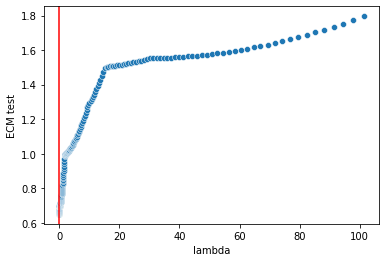

In [183]:
p=sns.scatterplot(data=df.loc[0:800], y="ECM test", x="lambda")
p.axvline(lambda_optimo_Lasso_df['lambda'][0], 0, 1, color='red')

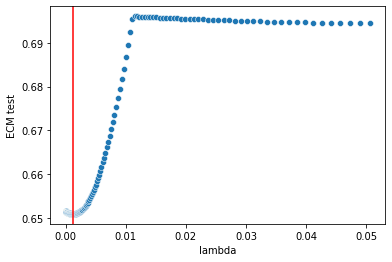

In [182]:
p =sns.scatterplot(data=df.loc[0:580], y="ECM test", x="lambda")
p.axvline(lambda_optimo_Lasso_df['lambda'][0], 0, 1, color='red')

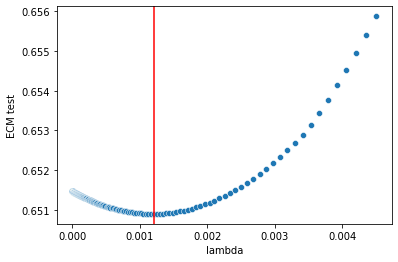

In [181]:
p = sns.scatterplot(data=df.loc[0:510, ], y="ECM test", x="lambda")
p.axvline(lambda_optimo_Lasso_df['lambda'][0], 0, 1, color='red')

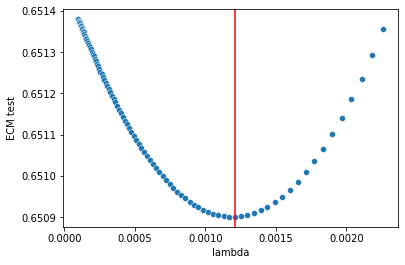

In [179]:
p = sns.scatterplot(data=df.loc[400:490, ], y="ECM test", x="lambda")
p.axvline(lambda_optimo_Lasso_df['lambda'][0], 0, 1, color='red')

In [66]:
Lasso_sklearn = sklearn.linear_model.Lasso( alpha=lambda_optimo_Lasso_df['lambda'][0] )

Lasso_sklearn.fit(X_train, Y_train)

ECM_test_Lasso_lambda_optimo = sum( ( Lasso_sklearn.predict(X_test) - Y_test)**2 ) / len(Y_test)

In [67]:
ECM_test_Lasso_lambda_optimo

0.6509044332281017

In [68]:
Elastic_Net_sklearn = sklearn.linear_model.ElasticNet( alpha=1.0 ,  l1_ratio=0.5,  fit_intercept=True)

Elastic_Net_sklearn.fit(X_train, Y_train)  # No es necesario escalar los datos.

ECM_test_ElasticNet = sum( ( Elastic_Net_sklearn.predict(X_test) - Y_test)**2 ) / len(Y_test)

In [69]:
ECM_test_ElasticNet

0.7356102999687527

In [36]:
Elastic_Net_sklearn.coef_

array([-0.01173224,  0.01198164,  0.        ,  0.        ,  0.        ,
        0.01544545, -0.        ,  0.09621767,  0.00330205, -0.        ,
       -0.00201883,  0.01563423,  0.        ])

In [37]:
Elastic_Net_sklearn.feature_names_in_

array(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'], dtype=object)

In [38]:
Elastic_Net_sklearn.intercept_

-3.5700919297866625

In [78]:
ECM_test_ElasticNet_vector = []

lambda_l1_ratio = []

for alpha in np.arange(0.0001, 1, 0.0005).round(5):

    for l1_ratio in np.arange(0.01, 1.0, 0.1).round(2) :

        lambda_l1_ratio.append( [alpha, l1_ratio])

        ElasticNet_sklearn = sklearn.linear_model.ElasticNet( alpha=alpha ,  l1_ratio=l1_ratio ,  fit_intercept=True)

        ElasticNet_sklearn.fit(X_train, Y_train)

        ECM_test_ElasticNet_vector.append( sum( ( ElasticNet_sklearn.predict(X_test) - Y_test)**2 ) / len(Y_test) )

In [79]:
lambda_l1ratio_optimo_ElasticNet_df = pd.DataFrame({ 'ECM test':ECM_test_ElasticNet_vector , 'lambda_l1ratio':lambda_l1_ratio }).sort_values(by=["ECM test"]).reset_index(drop=False)

In [80]:
lambda_l1ratio_optimo_ElasticNet_df

,index,ECM test,lambda_l1ratio
0,19,0.651249,"[0.0006, 0.91]"
1,29,0.651361,"[0.0011, 0.91]"
2,9,0.651406,"[0.0001, 0.91]"
3,8,0.651435,"[0.0001, 0.81]"
4,7,0.651465,"[0.0001, 0.71]"
...,...,...,...
19995,19959,0.796759,"[0.9976, 0.91]"
19996,19969,0.796838,"[0.9981, 0.91]"
19997,19979,0.796917,"[0.9986, 0.91]"
19998,19989,0.796996,"[0.9991, 0.91]"


In [ ]:
ElasticNet_sklearn = sklearn.linear_model.ElasticNet( alpha=lambda_l1ratio_optimo_ElasticNet_df['lambda_l1ratio'][0][0] , l1_ratio=lambda_l1ratio_optimo_ElasticNet_df['lambda_l1ratio'][0][1] )

ElasticNet_sklearn.fit(X_train, Y_train)

ECM_ElasticNet_test_lambda_l1ratio_optimo = sum( ( ElasticNet_sklearn.predict(X_test) - Y_test)**2 ) / len(Y_test)

In [ ]:
ECM_ElasticNet_test_lambda_l1ratio_optimo

0.6992370284427301

Ahora usando `statmodels` 

In [ ]:
import statsmodels.api as sm

In [ ]:
Ridge_sm = sm.OLS(Y_train , X_train)

Ridge_sm = Ridge_sm.fit_regularized(method='elastic_net', alpha=1 , L1_wt=0)

In [ ]:
Ridge_sm.params

array([-0.01169994,  0.03877527,  0.00703913,  0.00725833, -0.04280202,
        0.00896687, -0.07039868,  0.14841331,  0.00023769, -0.11661207,
       -0.00212729,  0.02615825, -0.00355063])

In [ ]:
X_train.columns

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
ECM_test_Ridge_sm = (( Ridge_sm.predict(X_test) - Y_test)**2 ).sum() / len(Y_test)

In [ ]:
ECM_test_Ridge_sm

0.679436177349994

In [ ]:
Lasso_sm = sm.OLS(Y_train , X_train)

Lasso_sm = Lasso_sm.fit_regularized(method='elastic_net', alpha=1 , L1_wt=1)

In [ ]:
Lasso_sm.params

zn        -0.023699
indus      0.013049
chas       0.000000
nox        0.000000
rm         0.000000
age        0.000000
dis        0.000000
rad        0.112224
tax        0.002372
ptratio   -0.057518
black     -0.004797
lstat      0.009760
medv       0.000000
dtype: float64

In [ ]:
ECM_test_Lasso_sm = (( Lasso_sm.predict(X_test) - Y_test)**2 ).sum() / len(Y_test)

In [ ]:
ECM_test_Lasso_sm

0.8085335348890553

In [ ]:
ElasticNet_sm = sm.OLS(Y_train , X_train)

ElasticNet_sm = ElasticNet_sm.fit_regularized(method='elastic_net', alpha=1 , L1_wt=0.5)

In [ ]:
ECM_test_ElasticNet_sm = (( ElasticNet_sm.predict(X_test) - Y_test)**2 ).sum() / len(Y_test)

In [ ]:
ECM_test_ElasticNet_sm

0.7291020187220859

# Comparación Final

In [ ]:
ECM_test_MCO_completo

0.6514719611490994

In [ ]:
ECM_test_MCO_mejor

1.5402752002272841

In [ ]:
ECM_test_Ridge_lambda_optimo

0.6652010112086071

In [ ]:
ECM_test_Lasso_lambda_optimo

0.8124487192624898

In [ ]:
ECM_ElasticNet_test_lambda_l1ratio_optimo

0.6992370284427301